## Demo 2. Benchmarking onset by region and lead time

This demo shows examples of how to find forecast skill for differnet regions and lead times.  

the objective is to:
1. learn how to define custom regions in ROMP 
2. understand how skill score changes with different lead times.

In [5]:
# load libraries for this notebook
import momp.lib.loader as loader
from pathlib import Path
from IPython.display import Image, display

In [4]:
# copy the demo config file to your package
get_cfg = loader.get_cfg
cfg = get_cfg()
base_dir = cfg.base_dir
!cp {base_dir}/../demo/et/config_et_prob.in {base_dir}/params/config.in

Configuration validated!


In [2]:
# from momp.app.onset_time_series import obs_onset_analysis as ons
import momp.app.onset_time_series as ots
ons = ots.obs_onset_analysis
print("region = ", cfg.region)

Configuration validated!
Configuration validated!
Configuration validated!
region =  Sub_Ethiopia


<br>

we can see the region specified in the config file is "Sub_Ethiopia", which is a user defined sub region in the eastern highland.   

Open `params/region_def.py`, and in the `domain()` function, we can see the exact boundaries that defines this rectangular subregion. 

```
        lats = 7.5
        latn = 13.5
        lonw = 37.5
        lone = 40
```

this is also the default region when we run the probabilistic metrics in the demo 1 notebook.  

Since we have the output and figures saved from Demo 1 runs, let's have a look at the domain aggregated BSS and AUC for gencast model



loading figure ../demo/et/figure/skill_scores_heatmap_gencast_1-15.png


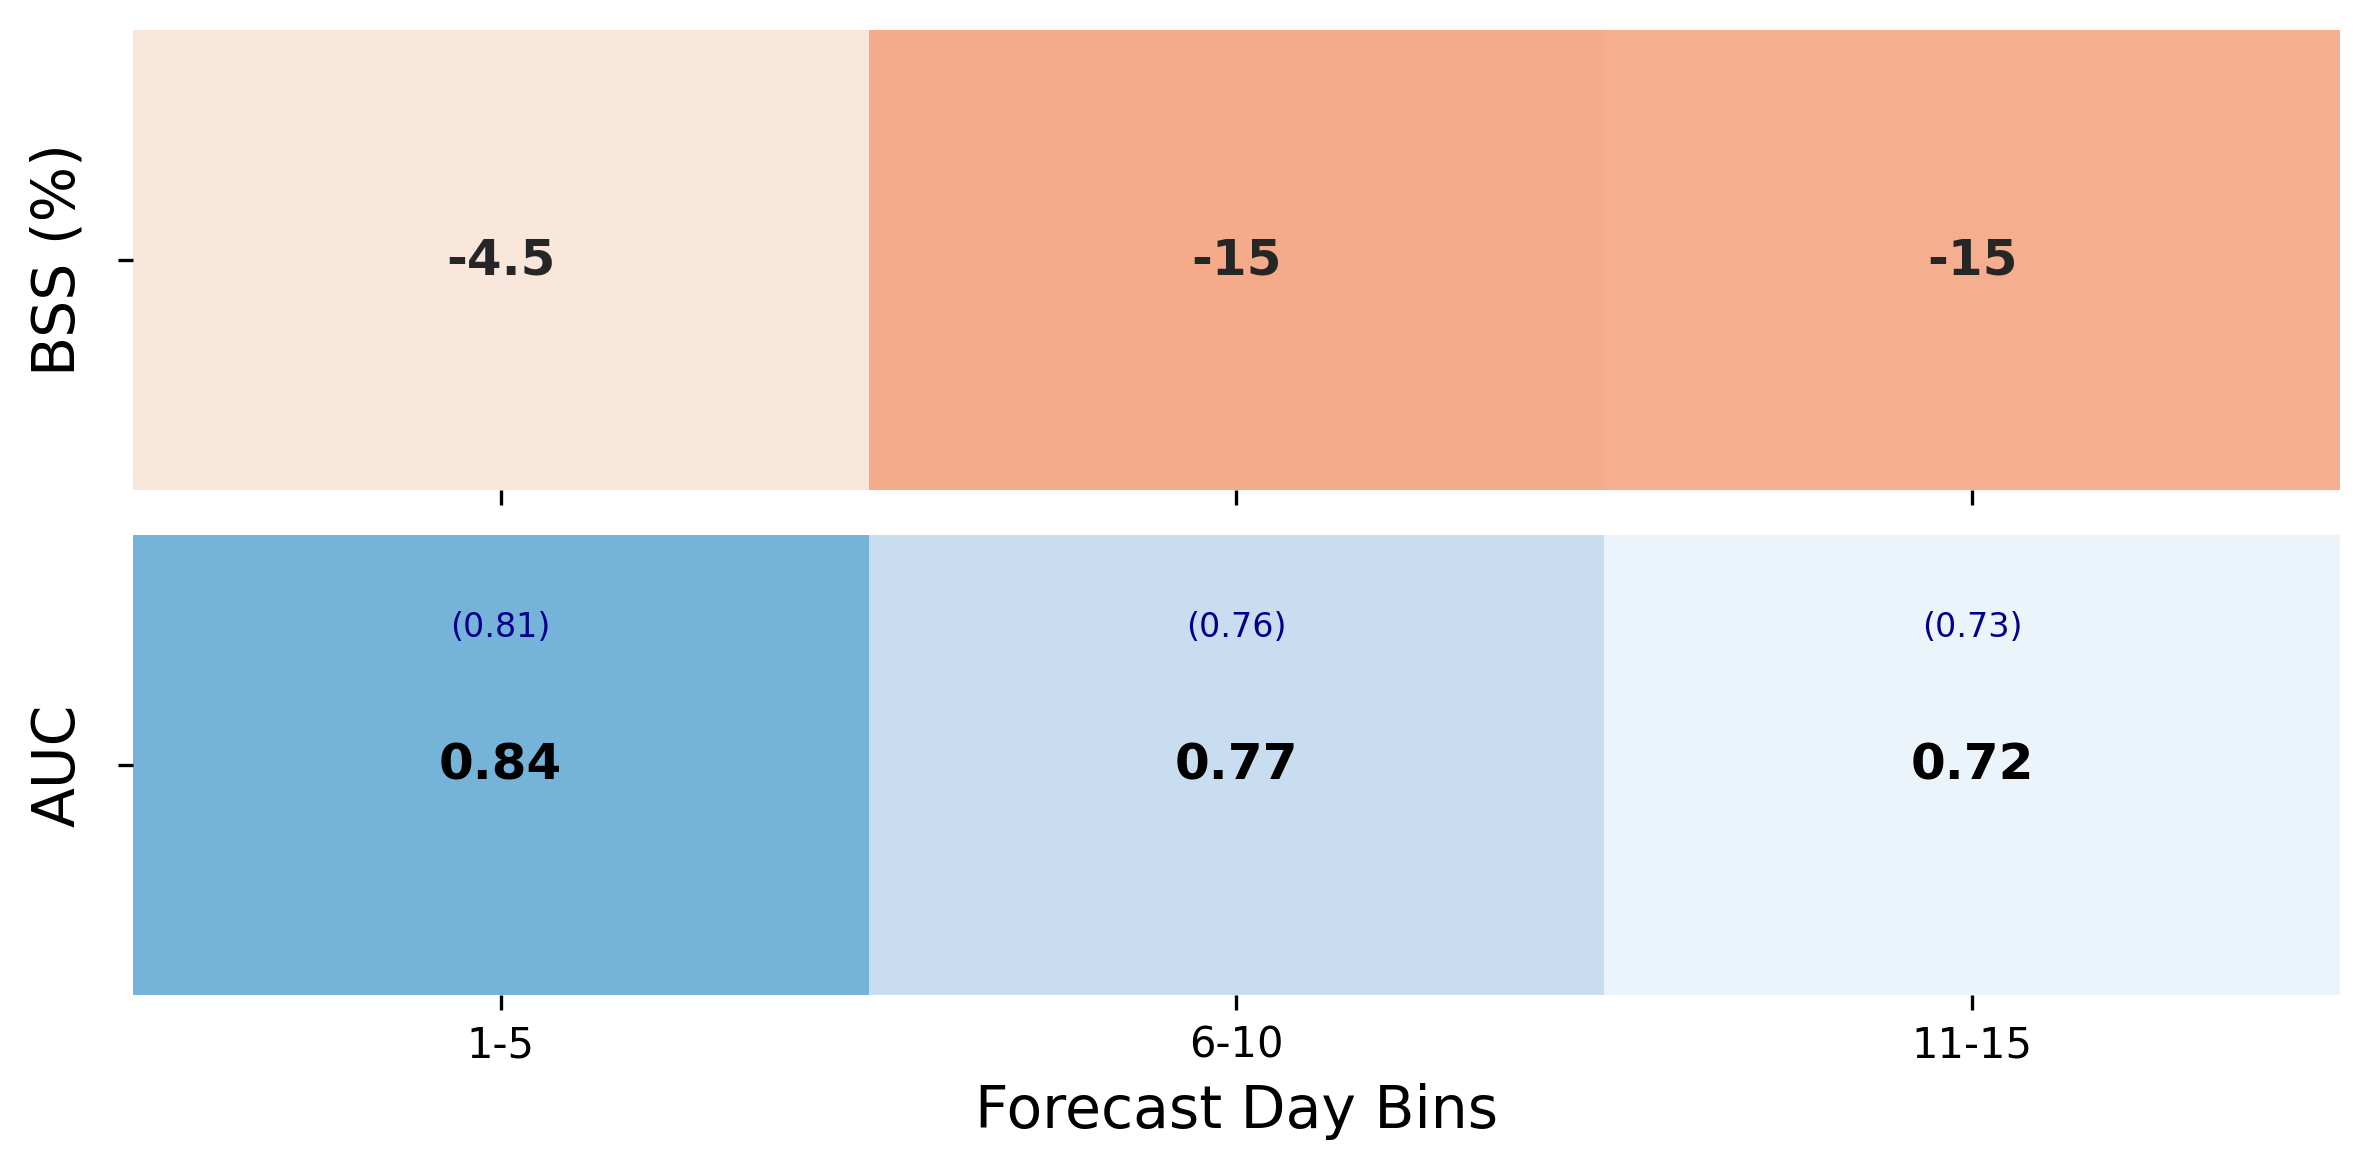

In [9]:
import os
from momp.utils.printing import tuple_to_str
window = tuple_to_str(cfg.verification_window_list[0])
model = cfg.model_list[1]
dir_fig = cfg.dir_fig
fig_filename = os.path.join(dir_fig, f'skill_scores_heatmap_gencast_{window}.png')
print(f"loading figure {fig_filename}")
display(Image(filename=fig_filename, width=510))

<br>

##### Prompt: what do these skill scores imply in operational forecast?   

<br>

now change the boundaries to the domain of your interest, and run the package. 

in the `domain()` function, create a boundary definition section with your preferred name, e.g.,  

```
    if region == "domain_highland_east":
        lats = 10.5 
        latn = 12.5
        lonw = 37.5
        lone = 40
```

then in the `config.in` change the region entry to 

`region = "domain_highland_east"`


run the package `momp-run`  

once the benchmarking workflow is complete, open the figure and compare the difference


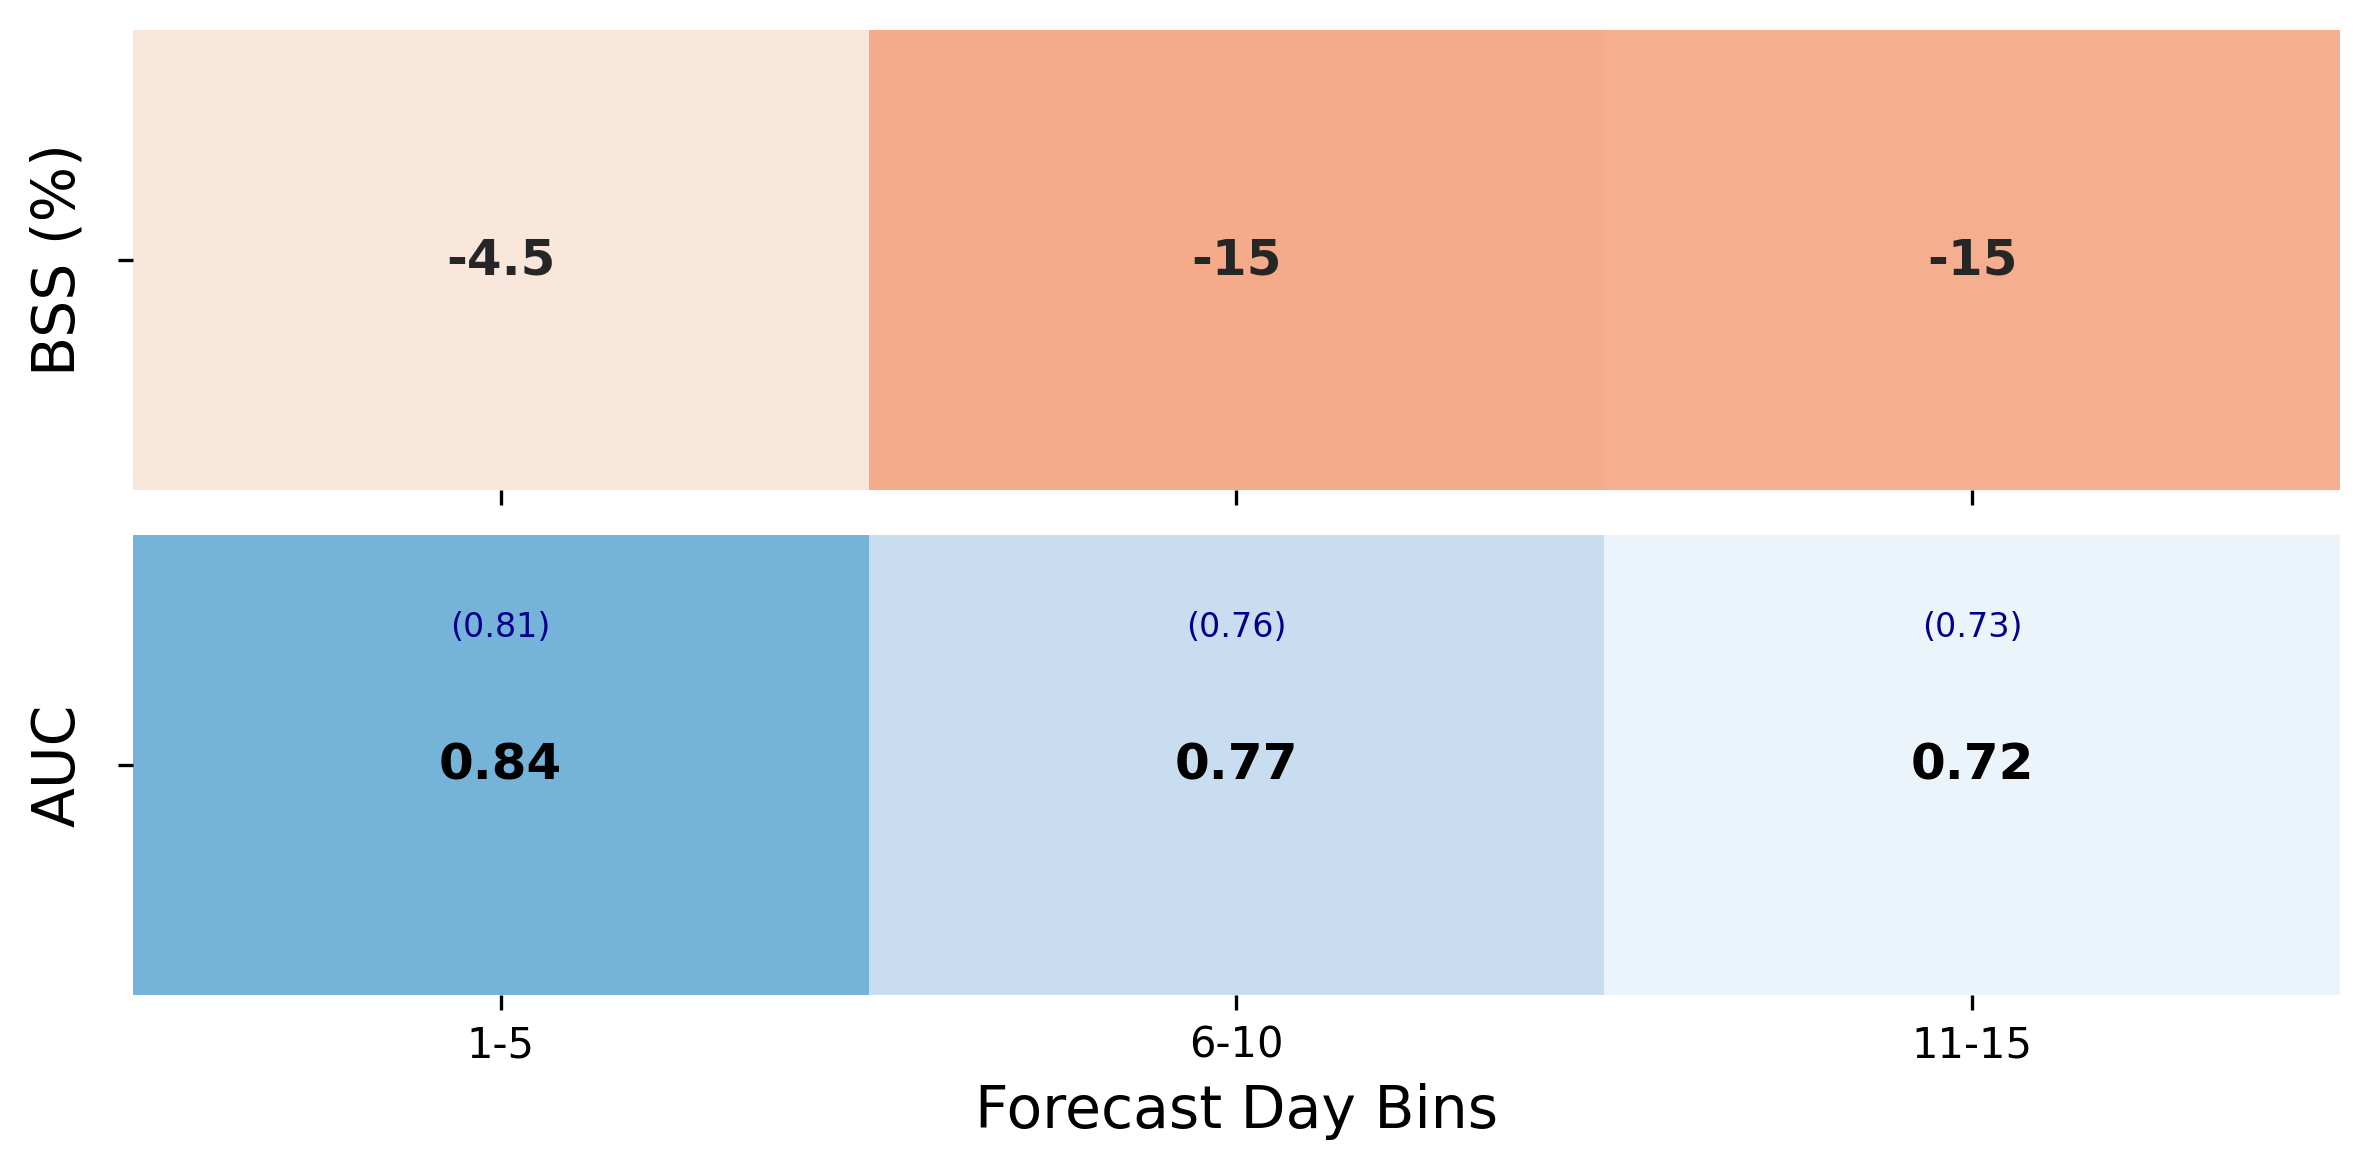

In [10]:
display(Image(filename=fig_filename, width=510))

<br>

##### Prompt: does the new region have higher forecast skill score? 

<br>

Note that when ploting spatial maps, we have an option to overlay our custom defined domain boundary on the map, that's set in the `rect_boundary` section, e.g., 

```
    if region == "rect_boundary":
        lats = 8
        latn = 12
        lonw = 38
        lone = 42

```

<br>

an example of the box boundary is like:

loading figure ../demo/et/figure/spatial_metrics_gencast_1-15.png


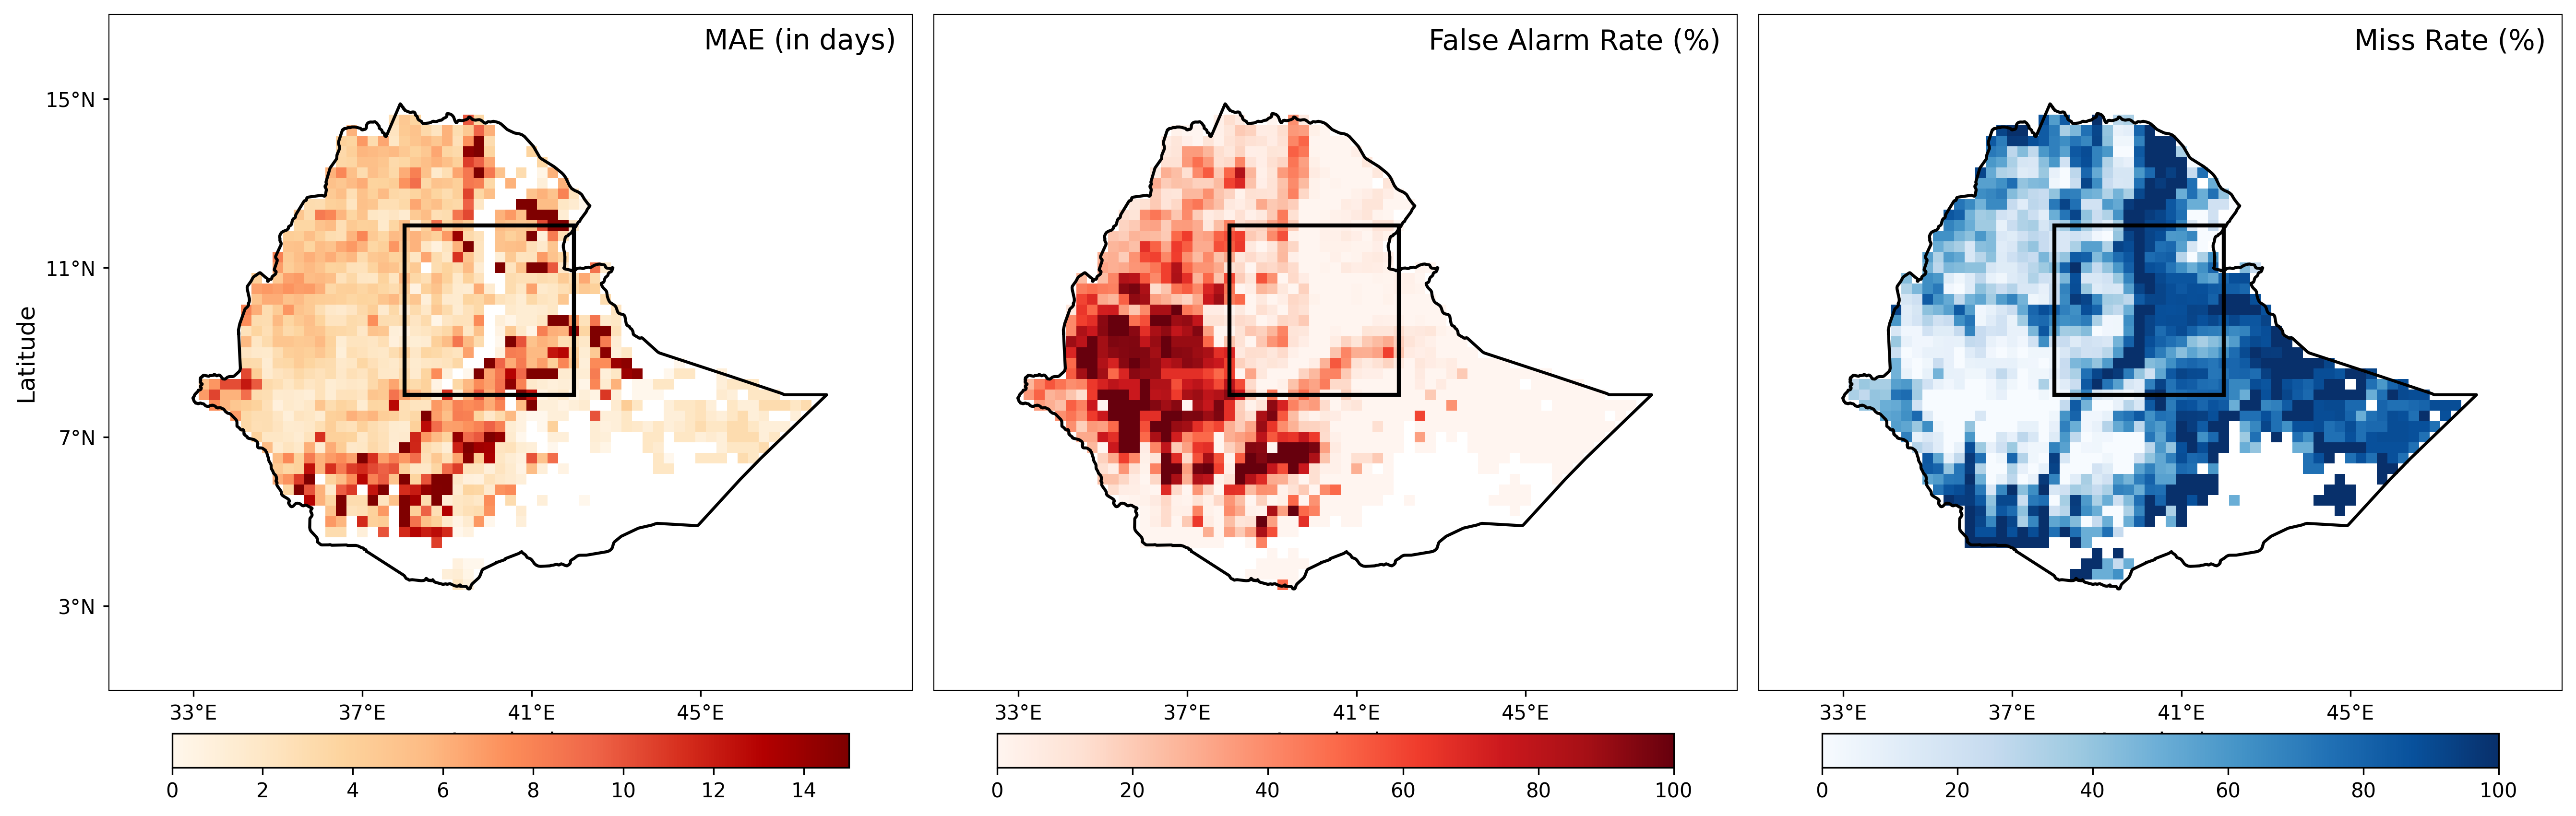

In [13]:
window = tuple_to_str(cfg.verification_window_list[0])
model = cfg.model_list[1]
fig_filename = os.path.join(dir_fig, f'spatial_metrics_gencast_{window}.png')
print(f"loading figure {fig_filename}")
display(Image(filename=fig_filename, width=710))

<br>

##### Prompt: how does the model skill compare spatially? 

<br>
<br>




Next, we will examine how the skill scores vary with **forecast lead time**.  

change the following parameters in `config.in`
```
verification_window_list = ((16, 30),)
tolerance_days_list = (5, )
max_forecast_day = 30
day_bins = ((16, 20), (21, 25), (26, 30))
```

and run the package `momp-run`

after the benchmarking workflow is complete, open the figure and compare it with the 1-15 window forecast


loading figure ../demo/et/figure/skill_scores_heatmap_gencast_16-30.png


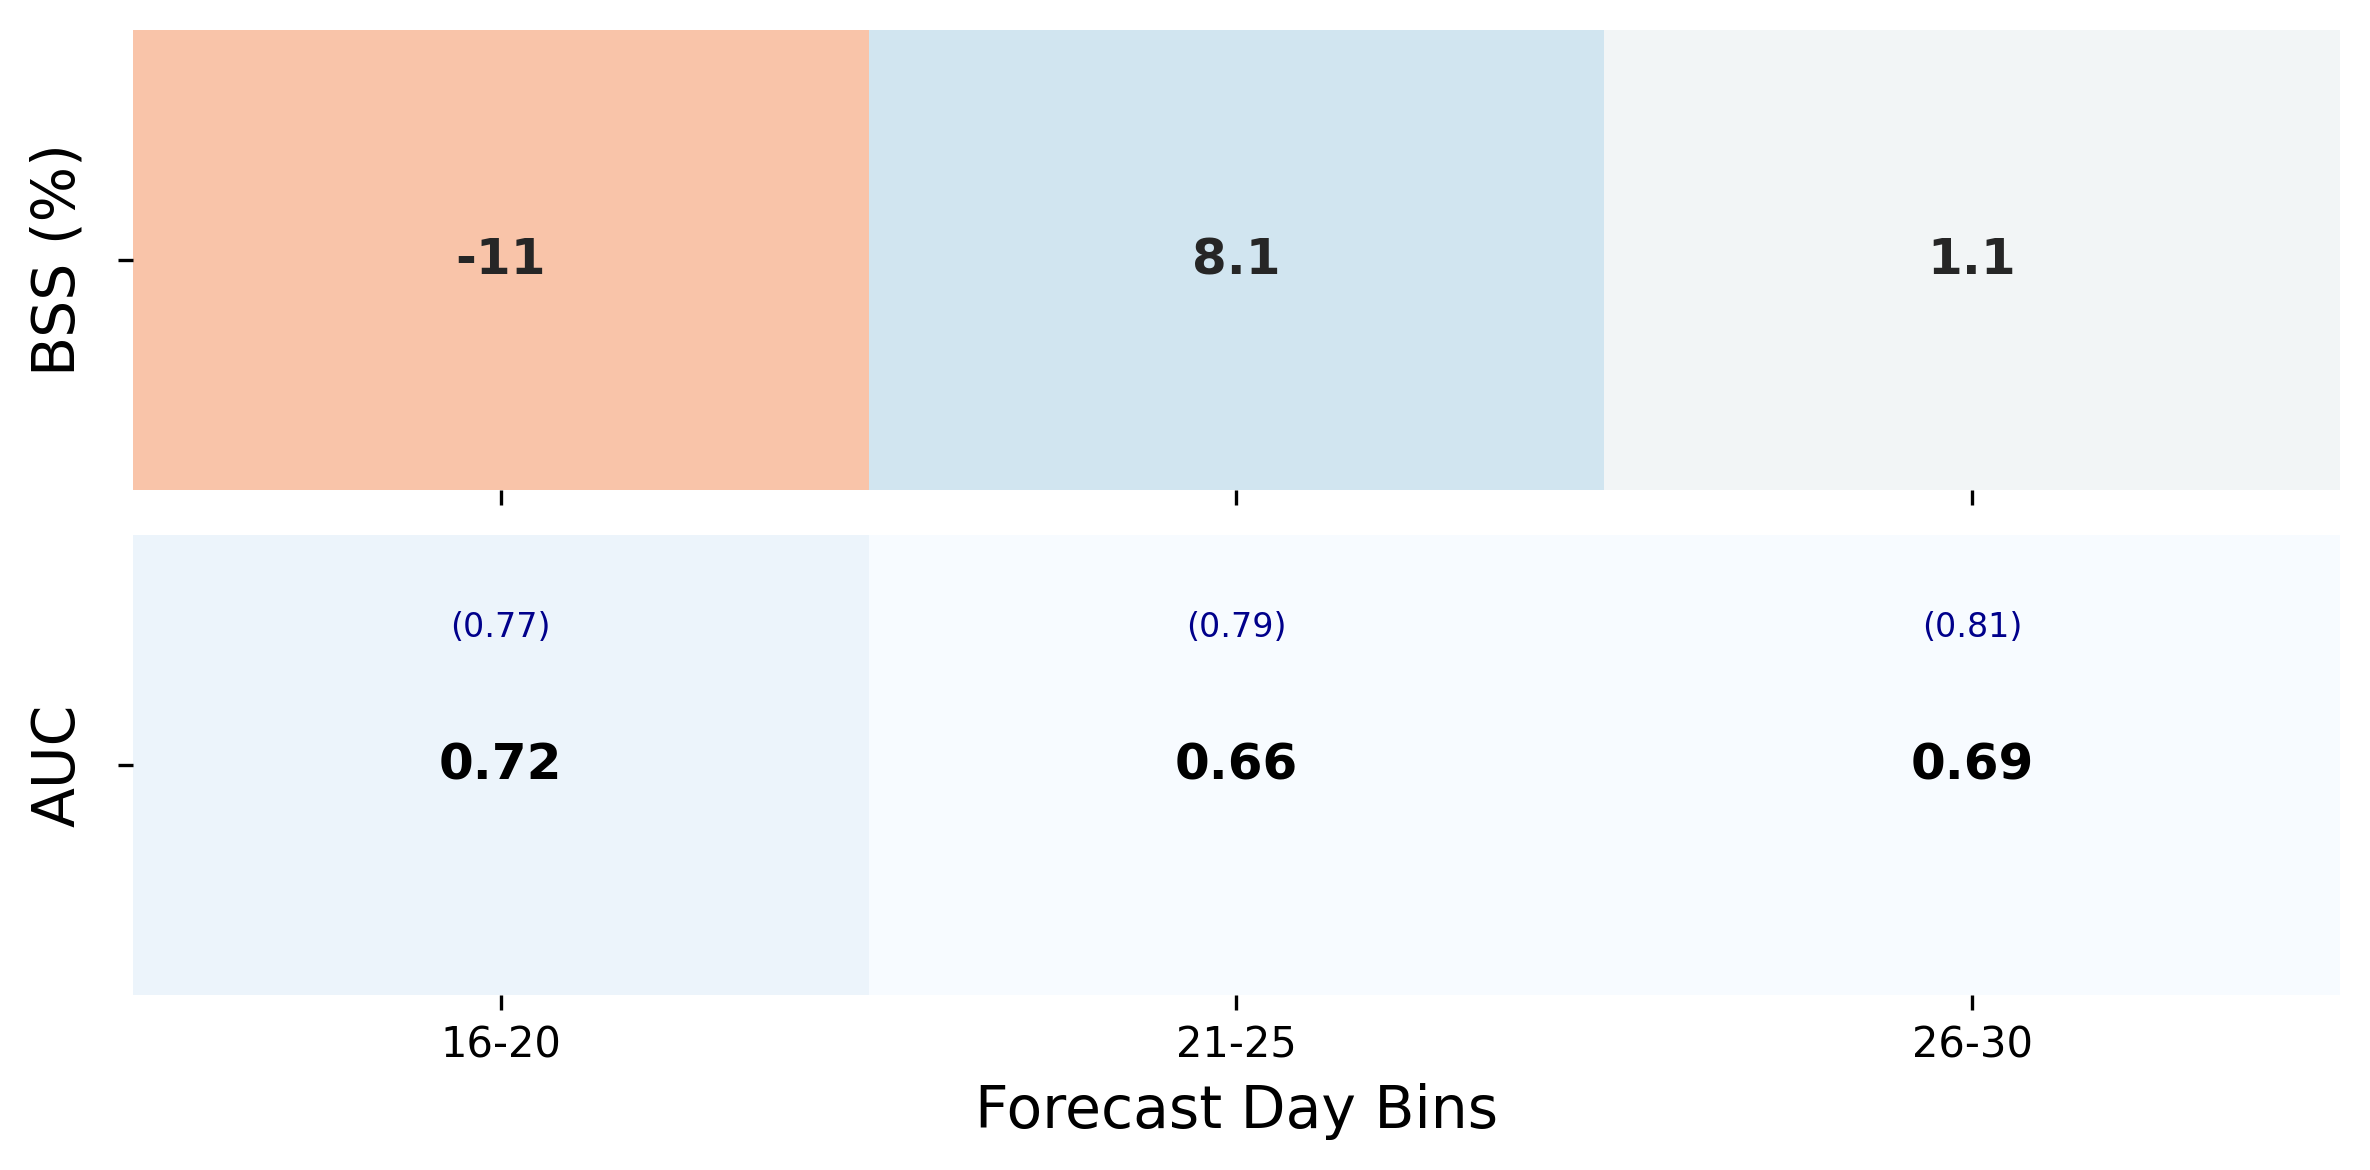

In [15]:
# import importlib
# importlib.reload(loader)
# get_cfg = loader.get_cfg
# cfg = get_cfg()
# window = tuple_to_str(cfg.verification_window_list[0])
# model = cfg.model_list[1]
fig_filename = os.path.join(dir_fig, f'skill_scores_heatmap_gencast_16-30.png')
print(f"loading figure {fig_filename}")
display(Image(filename=fig_filename, width=510))

<br>

##### Prompt: How do the model skill compare as lead time increases?